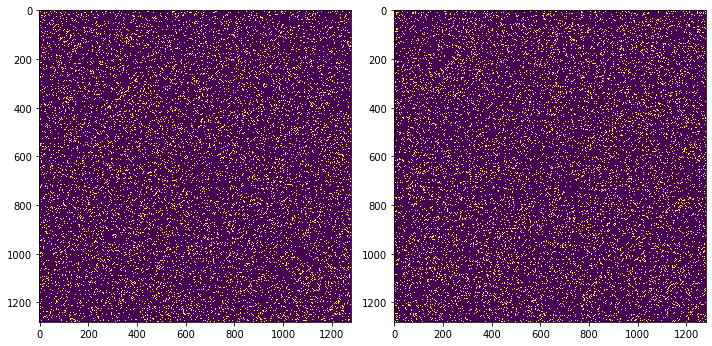

In [6]:
import numpy as np
from numpy.random import default_rng 
from numpy import linalg
import math
import matplotlib.pyplot as plt
from matplotlib import colors

rng = default_rng()
n_vert = 640
dens = 0.1
skew = 0.05

def symmetrize(a):
    return np.tril(a) + np.tril(a,-1).T

def blockmod(N,pin,pout):
    m11 = symmetrize(rng.binomial(n=1,p=pin,size=(N,N)))
    m12 = rng.binomial(n=1,p=pout,size=(N,N))
    m22 = symmetrize(rng.binomial(n=1,p=pin,size=(N,N)))
    m21 = m12.T
    m1 = np.concatenate((m11,m12),axis=1)
    m2 = np.concatenate((m21,m22),axis=1)
    return np.concatenate((m1,m2),axis=0)

def sortp(v,a, invert = False):
    k = len(v)
    used = [ False ] * k
    s = [ ]
    while False in used:
        mindx = used.index(False)
        m = v[mindx]
        for j in range(k):
            if not used[j] and v[j] < m:
                mindx = j
                m = v[j]
        s.append(mindx)
        used[mindx] = True
    P = np.zeros((k,k))
    for j in range(k):
        P[j][s[j]] = 1
    if invert:
        return P.T @ a @ P
    else:
        return P @ a @ P.T

type = [ 0 ] * n_vert + [ 1 ] * n_vert
rng.shuffle(type)

Asorted = blockmod(n_vert,dens,dens)
Bsorted = blockmod(n_vert,dens+skew,dens-skew)
A = sortp(type,Asorted,invert = True)
B = sortp(type,Bsorted,invert = True)

def sidebyside(method,a,b):
    fig,(axs1,axs2) = plt.subplots(1,2,tight_layout = True, figsize = (10,5))
    im1 = axs1.imshow(method(a))
    im2 = axs2.imshow(method(b))
    plt.show()

sidebyside(lambda x: x, A, B)

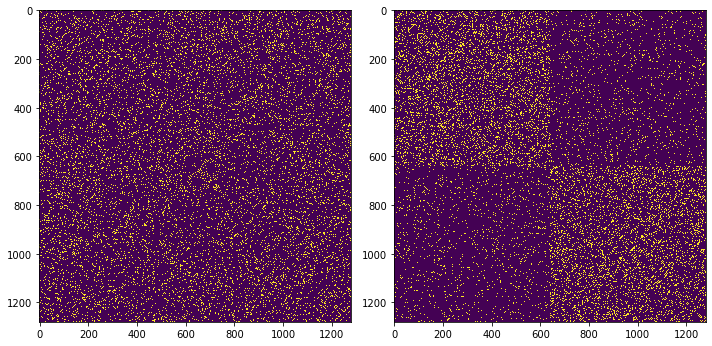

In [7]:
def cheatsort(a):
    return sortp(type,a)

sidebyside(cheatsort,A,B)

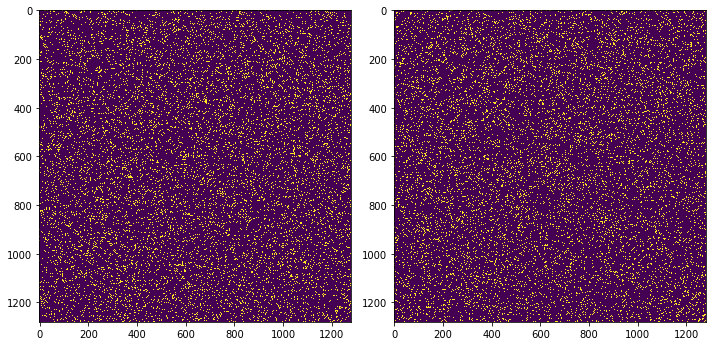

In [8]:
def sarahsort(a):
    return (sortp(a[0],a))

sidebyside(sarahsort,A,B)

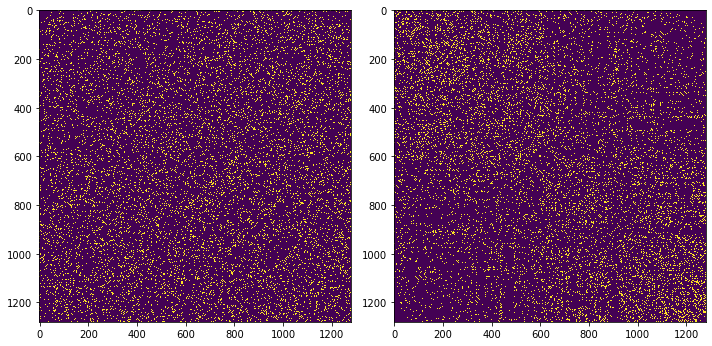

In [9]:
def sqsort(m):
    v = np.matmul(m[0],m)
    return sortp(v,m)

sidebyside(sqsort,A,B)

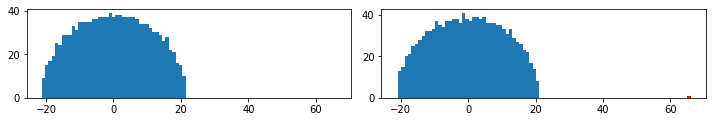

In [10]:

C = np.ones((2*n_vert,2*n_vert))
evA = linalg.eigvalsh(A - dens*C)
evB = linalg.eigvalsh(B - dens*C)
fig, (axs1,axs2) = plt.subplots(1,2,tight_layout = True,sharex = True,sharey = False,figsize=(10,1.8))
n_binsA = math.ceil(evA[-1] - evA[0])
n_binsB = math.ceil(evB[-1] - evB[0])
axs1.hist(evA,n_binsA)
N,bins,patches=axs2.hist(evB,n_binsB)
patches[-1].set_facecolor('red')
plt.show()

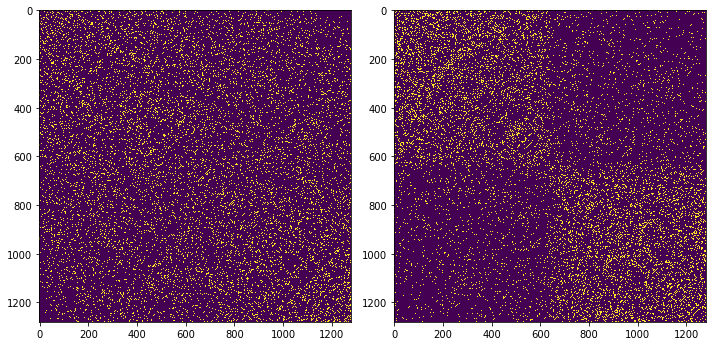

In [11]:
def eigsort(m):
    ev, em = linalg.eigh(m - dens*C)
    v = np.transpose(em)[-1]
    return sortp(v,m)

sidebyside(eigsort,A,B)